In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

sys.path.append('../')

pd.options.display.max_columns = 50

In [2]:
data_path = '../data/'
train = pd.read_csv(data_path + "raw/train_1.csv", header=0, delimiter=";",decimal=',',
                    parse_dates=['date'], index_col='date')
# train.dropna(how='any', inplace=True)

In [3]:
train.columns.values

array(['insee', 'tH2_obs', 'capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ddH10_rose4', 'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10', 'ech', 'mois'], dtype=object)

In [8]:
used_var = ['capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10']

In [5]:
def autocorrelation(x_array, t=1):
    return x_array.autocorr(t)

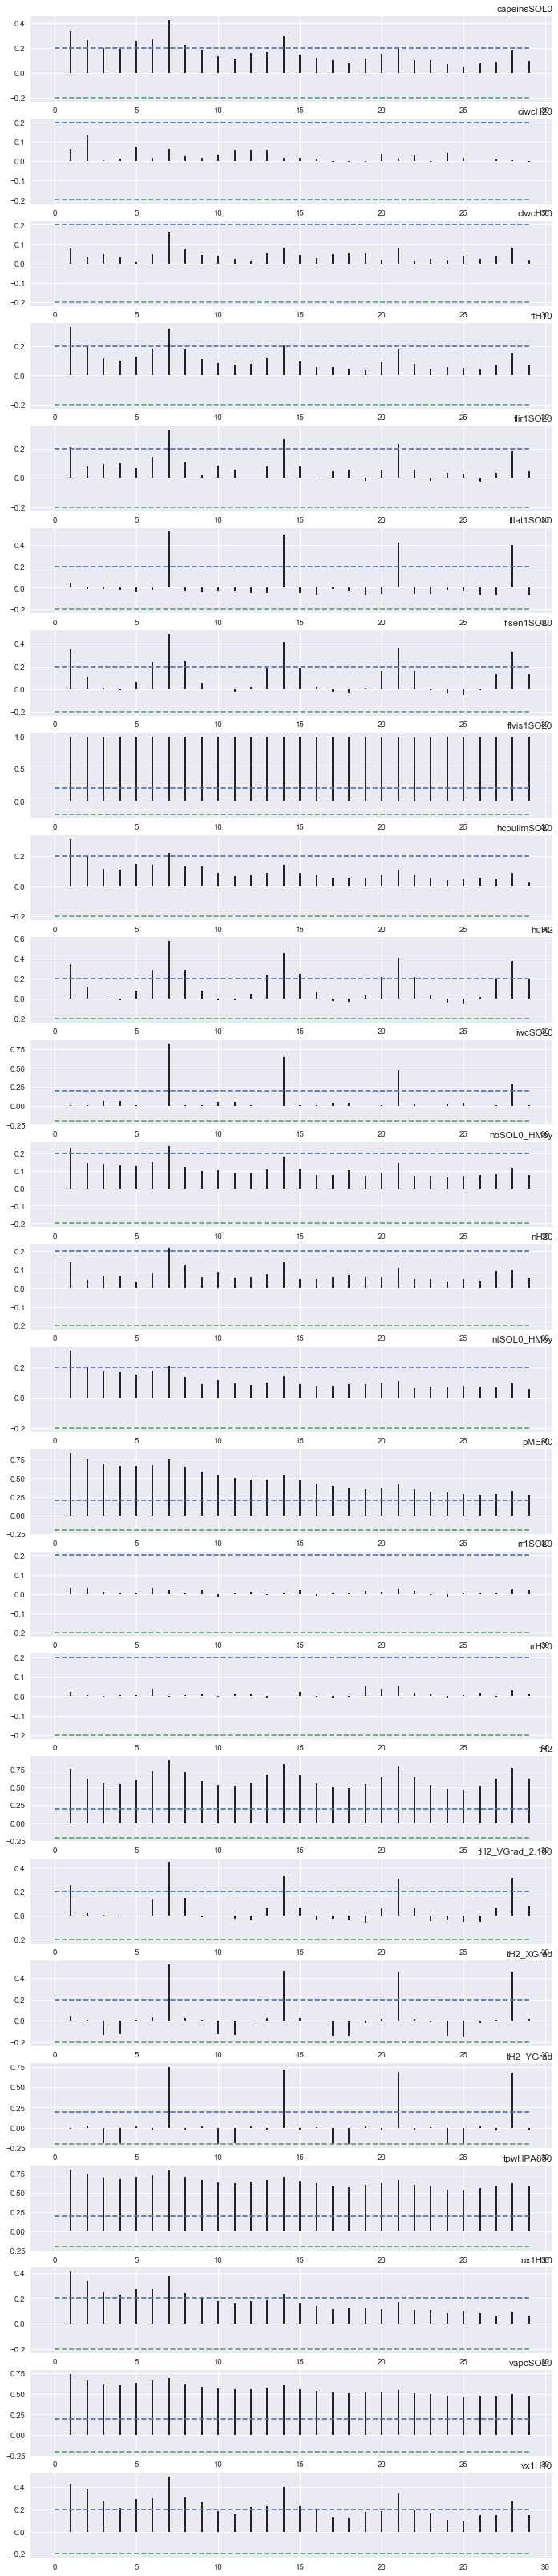

In [34]:
lag = 30
plt.figure(figsize=(12,60), dpi=70)

plot_number = 0
for var in used_var:
    plot_number += 1
    plt.subplot(len(used_var), 1, plot_number)
    acf = [autocorrelation(train[var], j) for j in range(1,lag)]

    plt.vlines(range(1,lag), 0, acf)
    plt.plot([0.2]*lag, '--')
    plt.plot([-0.2]*lag, '--')
    plt.title(var, loc='right')
plt.show()

# Conclusion

My significance lvl : > .5  
- until lag 7 : ['flvis1SOL0', 'pMER0', 'tH2', 'tpwHPA850', 'vapcSOL0']
- only lag 7 : ['huH2', 'iwcSOL0', 'tH2_YGrad']